# Assignment 3- Operation Clean Air
## Team ID- J008
### M1- Prince A Patel (24110248)
### M2- Monika Nagliya (24110209)
### M3- Arpit Gaur (24110052)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Understanding Dataset
### The folder Link provided below has 3 CSV files: 
- Data.csv: This CSV file contains information about the Air Quality Station, state, pollutant measurement, and a few other things about station location
- State_data.csv: This CSV file contains states, their area, and population
- NCAP_Funding.csv: This CSV file contains city, state, and funds received by them for different years

In [2]:
data = pd.read_csv('data.csv')
state_data = pd.read_csv('State_data.csv')
NCAP_Funding = pd.read_csv('NCAP_Funding.csv')
display(data.head())
display(state_data.head())
display(NCAP_Funding.head())

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


## 1. Spatial aggregation [4 Marks]

**Q1.** Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [7]:
highest_pm = data.groupby('state')['PM2.5'].mean()

highest_pm_state = highest_pm.idxmax()
highest_pm_conc = highest_pm.max()

print(f'The state with the highest PM2.5 concentration is {highest_pm_state} with a value of {highest_pm_conc} µg/m³')

The state with the highest PM2.5 concentration is Delhi with a value of 104.1009176780069 µg/m³


**Q2.** Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2023 = data[data['Timestamp'].dt.year == 2023]

hazardous_PM = data_2023[data_2023['PM2.5'] > 300]
hazardous_PM_size = hazardous_PM.groupby('state').size()

hazardous_PM_state = hazardous_PM_size.idxmax()
hazardous_PM_state_count = hazardous_PM_size.max()

print(f"{hazardous_PM_state} has the most number of days with PM2.5 concentration above 300 µg/m³ in 2023 with {hazardous_PM_state_count} days")

Delhi has the most number of days with PM2.5 concentration above 300 µg/m³ in 2023 with 470 days


**Q3.** Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [ ]:
# Variability can be measured by calculating the standard deviation of the PM2.5 concentration
variability = data.groupby('state')['PM2.5'].std()

most_variable_state = variability.idxmax()
most_variable_value = variability.max()

print(f"{most_variable_state} is the state with the highest variability in PM2.5 concentration in 2023 with a standard deviation of {most_variable_value}")

Delhi is the state with the highest variability in PM2.5 concentration in 2023 with a standard deviation of 84.55345160960931


**Q4.** Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [10]:
data_2020_2021 = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]

lowest_pm = data_2020_2021.groupby('state')['PM2.5'].mean()

lowest_pm_state = lowest_pm.idxmin()
lowest_pm_conc = lowest_pm.min()

print(f"The state with the lowest PM2.5 concentration during the covid period is {lowest_pm_state} with a value of {lowest_pm_conc} µg/m³")

The state with the lowest PM2.5 concentration during the covid period is Mizoram with a value of 14.323350150801287 µg/m³


## 2. Temporal Aggregation [3 Marks]

**Q1.** Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [11]:
data_august_2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]

highest_pm_august = data_august_2020.loc[data_august_2020['PM2.5'].idxmax()]

highest_pm_august_station = highest_pm_august['station']
highest_pm_august_state = highest_pm_august['state']
highest_pm_august_value = highest_pm_august['PM2.5']

print(f"The station with the highest PM2.5 value in August 2020 is {highest_pm_august_station} in {highest_pm_august_state} with the value of {highest_pm_august_value} µg/m³")

The station with the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in Karnataka with the value of 805.51 µg/m³


**Q2.** For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.


In [4]:
station_required = ['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
data_2018 = data[(data['Timestamp'].dt.year == 2018) & (data['station'].isin(station_required))]

winter = data_2018[(data_2018['Timestamp'].dt.month == 12) | (data_2018['Timestamp'].dt.month <= 2)]
summer = data_2018[(data_2018['Timestamp'].dt.month >= 3) & (data_2018['Timestamp'].dt.month <= 5)]
monsoon = data_2018[(data_2018['Timestamp'].dt.month >= 6) & (data_2018['Timestamp'].dt.month <= 9)]

winter_pm = winter['PM2.5'].mean()
summer_pm = summer['PM2.5'].mean()
monsoon_pm = monsoon['PM2.5'].mean()

print(f"The average PM2.5 concentration in winter is {winter_pm} µg/m³, in summer is {summer_pm} µg/m³, and in monsoon is {monsoon_pm} µg/m³")

highest_pollution_value = max(winter_pm, summer_pm, monsoon_pm)

if highest_pollution_value == winter_pm:
    season = 'winter'
elif highest_pollution_value == summer_pm:
    season = 'summer'
else:
    season = 'monsoon'

print(f"The season with the highest PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is {season} with an average concentration of {highest_pollution_value} µg/m³")

The average PM2.5 concentration in winter is 67.4923443634478 µg/m³, in summer is nan µg/m³, and in monsoon is 34.42519611317571 µg/m³
The season with the highest PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is winter with an average concentration of 67.4923443634478 µg/m³


*[Thought Question]* Can you suggest some potential factors on why certain seasons are generally more polluted than others?


*Answer:* Based on the readings given in the document, the seasonal pollution has some potential factors:
1. Winter Pollution- Cold temperatures, stagnant air trap pollutants from heating sources and temperature inversions (common in North Indian cities such as Delhi).
2. Summer Pollution- Dry, windy conditions increases pollution levels particularly in construction sites and coastal regions. But, concentration values are absent in the data provided.
3. Monsoon Polltion- Crop harvesting requires transportation which involves fuel burning across India. But, heavy rainfall reduces PM concentrations significantly.

**Q3.** Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
* Calculate the monthly average PM2.5 for weekdays and weekends separately
* X-axis: Months (January to December).
* Y-axis: Average PM2.5 levels.
* Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


The average PM2.5 concentration on weekdays is 42.7898024449498 µg/m³
The average PM2.5 concentration on weekends is 41.1345804702066 µg/m³


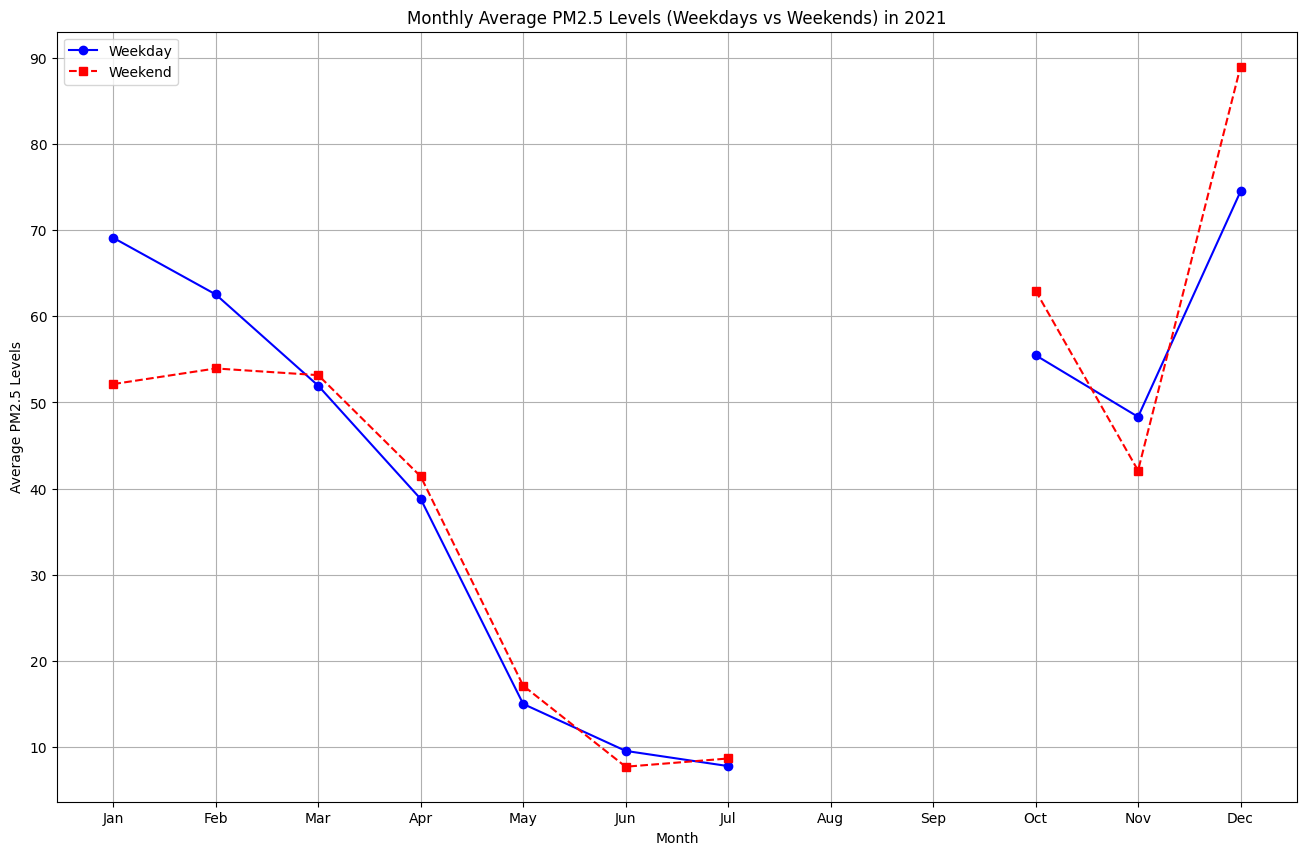

In [5]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = data[(data["station"] == station_name) & (data["Timestamp"].dt.year == 2021)]

df_station = df_station.copy()
df_station["Month"] = df_station["Timestamp"].dt.month
df_station["Weekday"] = df_station["Timestamp"].dt.weekday
df_station["DayType"] = df_station["Weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

df_grouped = df_station.groupby(["Month", "DayType"])["PM2.5"].mean().unstack()

plt.figure(figsize=(16, 10))
plt.plot(df_grouped.index, df_grouped["Weekday"], marker='o', linestyle='-', label="Weekday", color='blue')
plt.plot(df_grouped.index, df_grouped["Weekend"], marker='s', linestyle='--', label="Weekend", color='red')

print(f"The average PM2.5 concentration on weekdays is {df_station[df_station['DayType'] == 'Weekday']['PM2.5'].mean()} µg/m³")
print(f"The average PM2.5 concentration on weekends is {df_station[df_station['DayType'] == 'Weekend']['PM2.5'].mean()} µg/m³")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

## 3. Spatio-temporal aggregation [3 marks]


**Q1.** For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [4]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

df_2022 = data[data["Timestamp"].dt.year == 2022].copy()

df_2022["Month"] = df_2022["Timestamp"].dt.month
df_2022["Season"] = df_2022["Month"].apply(lambda x: "Summer" if x in [3, 4, 5] 
                                             else ("Monsoon" if x in [6, 7, 8, 9] 
                                                   else None))

state_season_avg = df_2022.groupby(["state", "Season"])["PM2.5"].mean().unstack()

state_season_avg["Percentage Change"] = ((state_season_avg["Monsoon"] - state_season_avg["Summer"]) / state_season_avg["Summer"]) * 100

most_difference_state = state_season_avg["Percentage Change"].abs().idxmax()
most_difference_value = state_season_avg.loc[most_difference_state, "Percentage Change"]

print(state_season_avg)
print(f"\nThe state with the highest difference is: {most_difference_state} with a percentage change of {most_difference_value:.2f}%.")

Season               Monsoon     Summer  Percentage Change
state                                                     
Andhra Pradesh     19.355510  30.128540         -35.756894
Arunachal Pradesh  15.069892  32.116292         -53.077110
Assam              21.872292  56.337647         -61.176419
Bihar              35.642356  75.834868         -53.000042
Chandigarh         32.758585  59.695914         -45.124242
Chhattisgarh       19.871696  22.321561         -10.975330
Delhi              42.769572  95.667628         -55.293579
Gujarat            35.852728  65.113078         -44.937747
Haryana            41.922458  81.727661         -48.704688
Himachal Pradesh   38.686133  61.471943         -37.067008
Jammu and Kashmir  18.049643  18.050196          -0.003063
Jharkhand                NaN        NaN                NaN
Karnataka          16.527449  33.387814         -50.498558
Kerala             28.852892  33.849203         -14.760499
Madhya Pradesh     22.473271  51.369364         -56.2516

**Q2.** Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


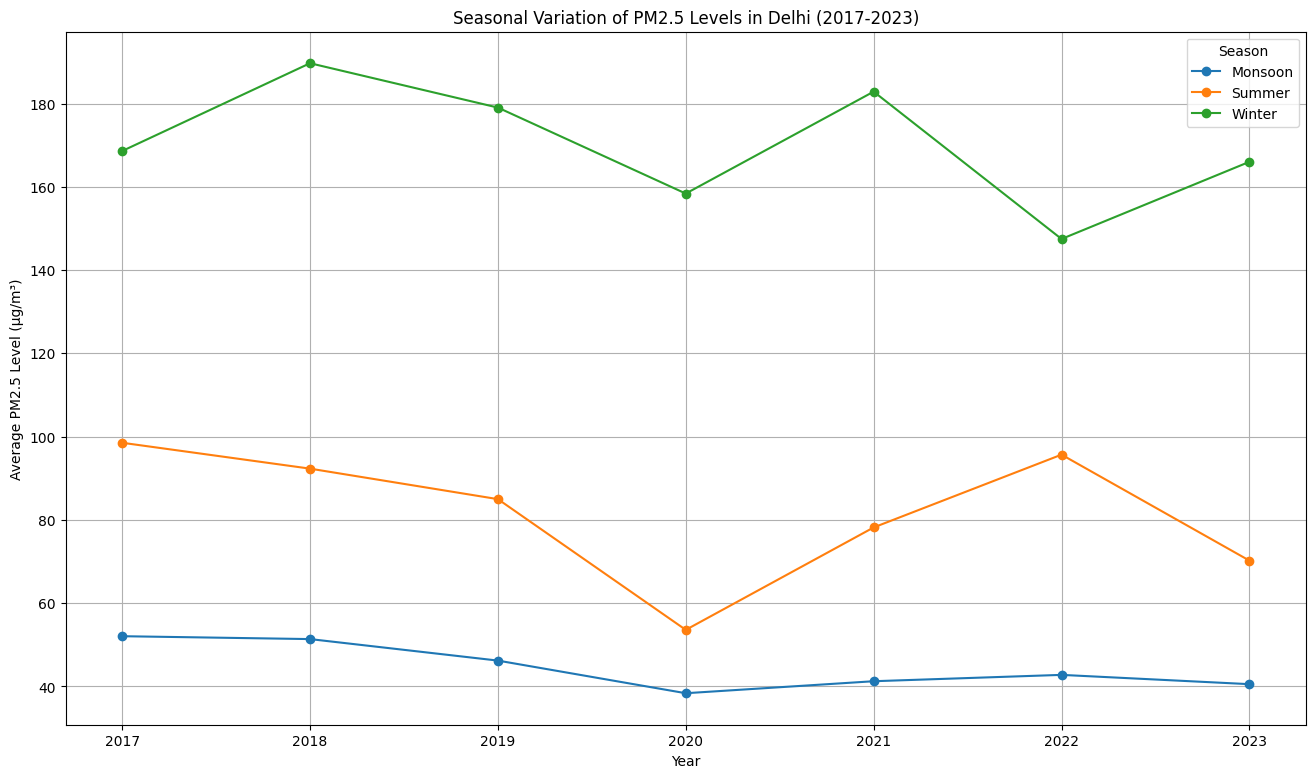

In [3]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
df_delhi = data[data["city"] == "Delhi"].copy()

df_delhi["Year"] = df_delhi["Timestamp"].dt.year
df_delhi["Month"] = df_delhi["Timestamp"].dt.month

df_delhi["Season"] = df_delhi["Timestamp"].dt.month.apply(lambda x: "Summer" if x in [3, 4, 5] 
                                             else ("Monsoon" if x in [6, 7, 8, 9]
                                                    else ("Winter" if x in [12, 1, 2]
                                                          else None)))
df_delhi = df_delhi[(df_delhi["Year"] >= 2017) & (df_delhi["Year"] <= 2023)]

seasonal_avg_pm = df_delhi.groupby(["Year", "Season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(16, 9))
seasonal_avg_pm.plot(marker="o", ax=plt.gca()) # get current axis
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.legend(title="Season")
plt.grid(True)
plt.show()

Key Observations:
1. Winter has the highest PM2.5 levels across all years, indicating severe pollution during December-February, likely due to factors like temperature inversion, low wind speeds, and increased emissions from heating and crop burning.
2. Summer has moderate PM2.5 levels, with some fluctuations but consistently lower than winter.
3. Monsoon has the lowest PM2.5 levels, as rain helps clear particulate matter from the air.

**Q3.** Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


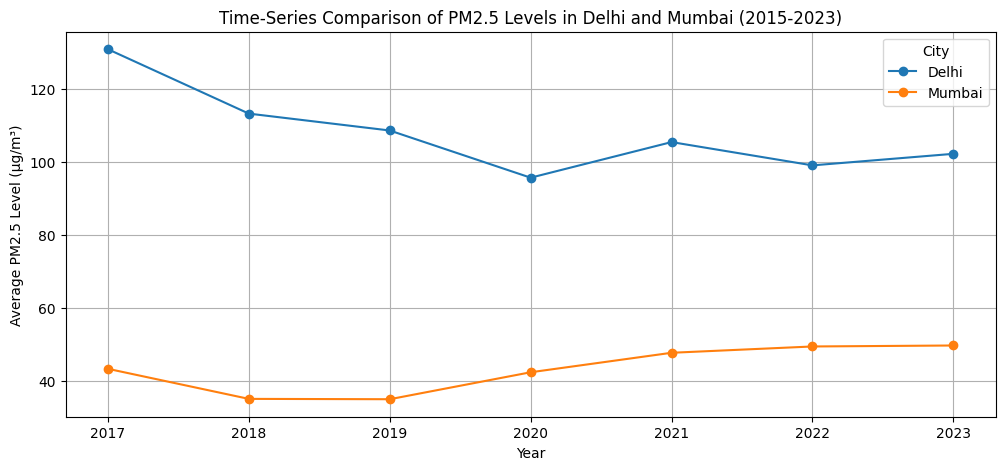

In [7]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

df_cities = data[data["city"].isin(["Delhi", "Mumbai"])].copy()
df_cities["Year"] = df_cities["Timestamp"].dt.year

df_cities = df_cities[(df_cities["Year"] >= 2015) & (df_cities["Year"] <= 2023)]

time_series = df_cities.groupby(["Year", "city"])["PM2.5"].mean().unstack()

plt.figure(figsize=(12, 5))
time_series.plot(marker="o", ax=plt.gca())
plt.title("Time-Series Comparison of PM2.5 Levels in Delhi and Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.legend(title="City")
plt.grid(True)
plt.show()

## 4. Population-Based [3 Marks]


**Q1.** Which state in India has the highest number of monitoring stations relative to its population? 


In [4]:
state_stations = data.groupby("state")["station"].nunique().reset_index()
state_stations.columns = ["State", "Number_of_Stations"]

state_stations = state_stations.merge(state_data, on="State", how="left")
state_stations["stations_per_million"] = (state_stations["Number_of_Stations"] / state_stations["Population"]) * 1000000

highest_ratio = state_stations.sort_values("stations_per_million", ascending=False).iloc[0]
print("State with highest monitoring stations per million people:")
print(highest_ratio)

State with highest monitoring stations per million people:
State                   Chandigarh
Number_of_Stations               3
Population                 1055450
Area (km2)                     114
stations_per_million       2.84239
Name: 4, dtype: object


**Q2.** Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

Top 5 states with highest PM2.5 exposure per capita in 2023:
        State      PM2.5  Population  Area (km2)  Per_Capita
0  Chandigarh  59.414055     1055450         114   56.292629
1      Sikkim  14.927530      610577        7096   24.448235
2     Tripura  80.469872     3673917       10491   21.903018
3  Puducherry  24.286078     1247953         479   19.460731
4    Nagaland  32.721157     1978502       16579   16.538349


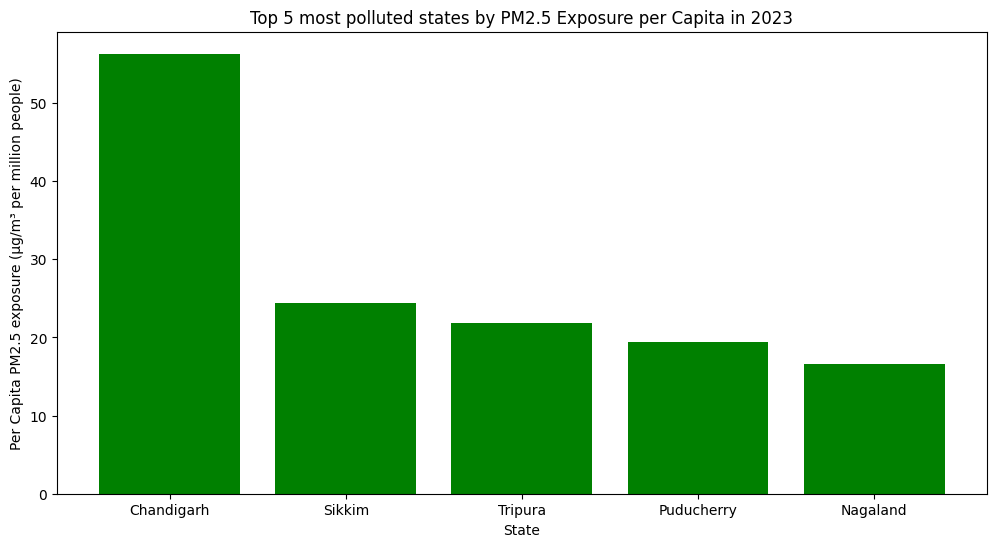

In [5]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2023 = data[data["Timestamp"].dt.year == 2023]

state_pm_25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()
state_pm_25.columns = ["State", "PM2.5"]
state_pm_25 = state_pm_25.merge(state_data, on="State", how="left")
state_pm_25["Per_Capita"] = (state_pm_25["PM2.5"] / state_pm_25["Population"]) * 1000000

top5_states = state_pm_25.sort_values("Per_Capita", ascending=False).head(5).reset_index(drop=True)

print("Top 5 states with highest PM2.5 exposure per capita in 2023:")
print(top5_states)

plt.figure(figsize=(12, 6))
plt.bar(top5_states["State"], top5_states["Per_Capita"], color='g')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 exposure (µg/m³ per million people)")
plt.title("Top 5 most polluted states by PM2.5 Exposure per Capita in 2023")
plt.grid(False)
plt.show()

**Q3.** Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
* X-axis: Population density (people per square kilometer).
* Y-axis: Average PM2.5 concentration.
* Use a scatter plot to show the relationship, where each point represents a state.

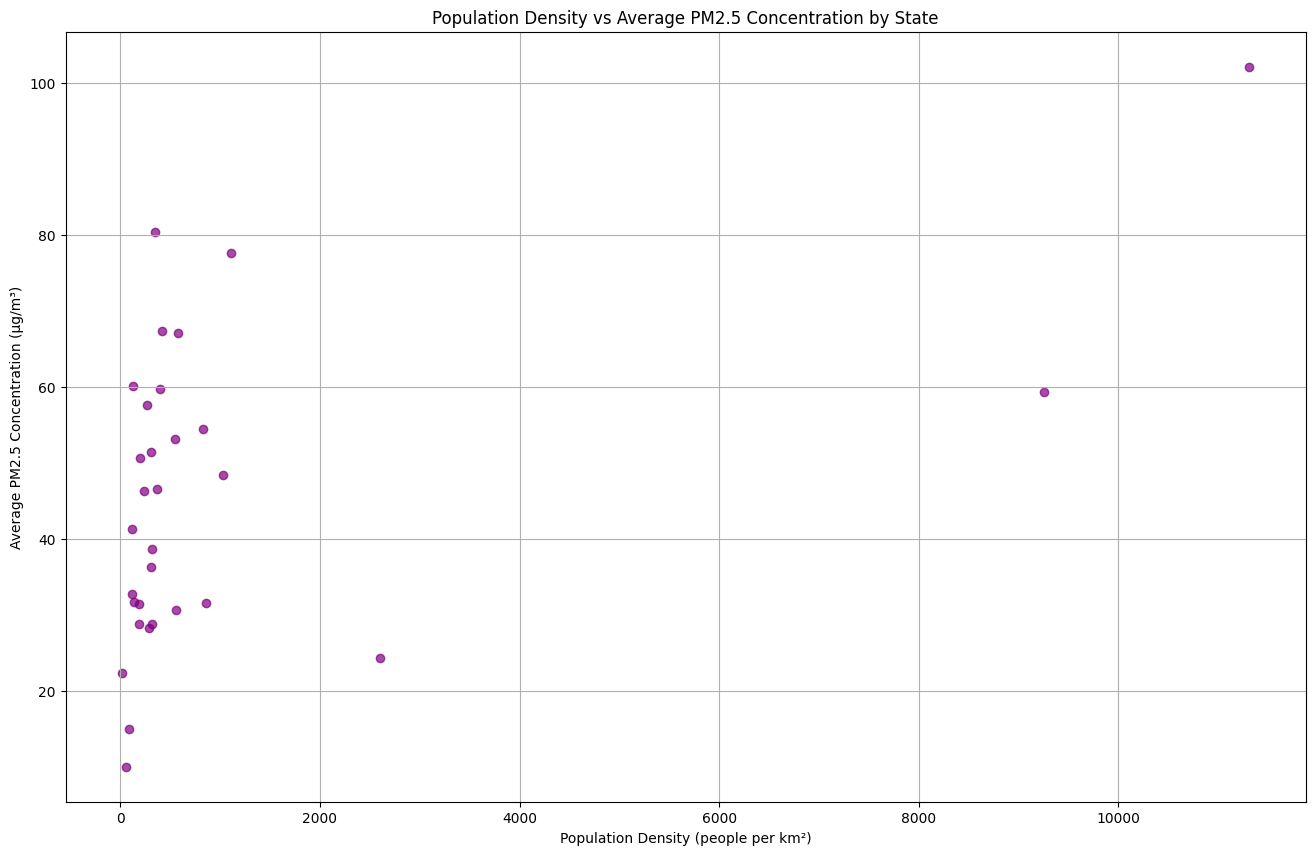

,State,PM2.5,Population,Area (km2),Per_Capita,Population_Density
0,Delhi,102.183923,16787941,1484,6.086745,11312.628706
1,Tripura,80.469872,3673917,10491,21.903018,350.197026
2,Bihar,77.647134,104099452,94163,0.745894,1105.523953
3,Jharkhand,67.343510,32988134,79716,2.041446,413.820739
4,Haryana,67.117568,25351462,44212,2.647483,573.406813
5,Himachal Pradesh,60.173842,6864602,55673,8.765817,123.302175
6,Assam,59.685088,31205576,78438,1.912642,397.837477
7,Chandigarh,59.414055,1055450,114,56.292629,9258.333333
8,Odisha,57.625852,41974219,155707,1.372887,269.571818
9,Uttar Pradesh,54.485003,199812341,240928,0.272681,829.344622


In [10]:
state_stations["Population_Density"] = state_stations["Population"] / state_stations["Area (km2)"]
population_density = state_pm_25.merge(state_stations[["State", "Population_Density"]], on="State", how="left")

plt.figure(figsize=(16, 10))
plt.scatter(population_density["Population_Density"], population_density["PM2.5"], color='purple', alpha=0.7)
plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Population Density vs Average PM2.5 Concentration by State")
plt.grid(True)
plt.show()

relation = population_density.sort_values("PM2.5", ascending=False).reset_index(drop=True)

display(relation)

_Correlation between population density and pollution:_
The plot does not show a clear trend as the data points are quite dispersed, particularly for lower population densities. While some states show extrmely high PM2.5 concentration (Delhi) high population densities (like, Chandigarh), there are also states with moderate population densities that have equally high pollution levels. A majority of states have relatively low population densities, but their pollution levels vary significantly, reinforcing inconsistency.

## 5. Area Based [4 Marks]

**Q1.** Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
* X-axis: States.
* Y-axis: PM2.5 concentration per square kilometer.
* Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


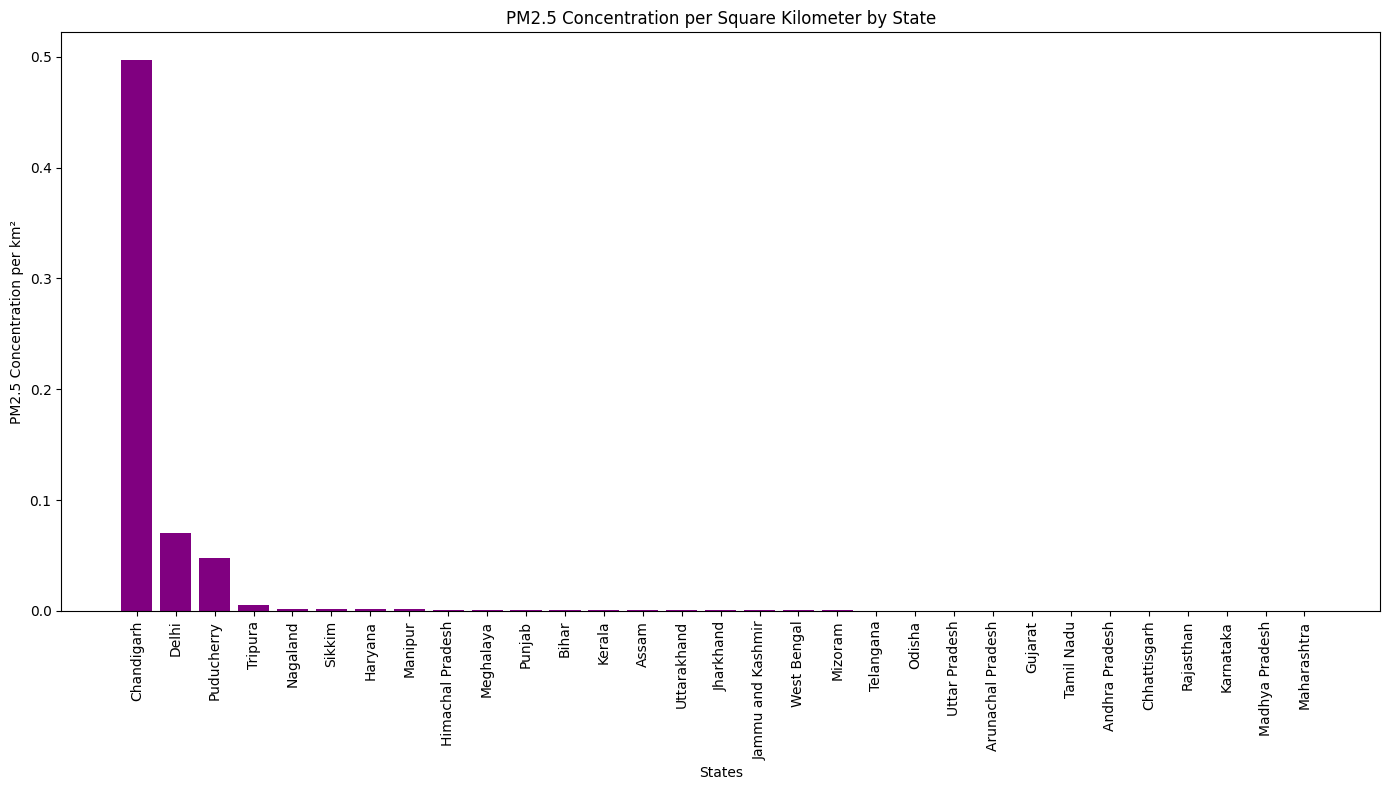

State with highest PM2.5 concentration per km²:
State            Chandigarh
Population          1055450
Area (km2)              114
Average_PM2.5     56.666803
PM2.5_per_km2      0.497077
Name: 29, dtype: object


In [18]:
pm25_by_state = data.groupby('state')['PM2.5'].mean().reset_index()
pm25_by_state.columns = ['State', 'Average_PM2.5']

merged_data = pd.merge(state_data, pm25_by_state, on='State', how='inner')
merged_data['PM2.5_per_km2'] = merged_data['Average_PM2.5'] / merged_data['Area (km2)']
merged_data = merged_data.sort_values(by='PM2.5_per_km2', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(merged_data['State'], merged_data['PM2.5_per_km2'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per km²')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.tight_layout()
plt.show()

highest_state = merged_data.iloc[0]
print(f"State with highest PM2.5 concentration per km²:")
print(highest_state)

**Q2.** Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


State with highest monitoring stations per km²:
State                     Delhi
Monitoring_Stations          40
Population             16787941
Area (km2)                 1484
Stations_per_km2       0.026954
Name: 6, dtype: object


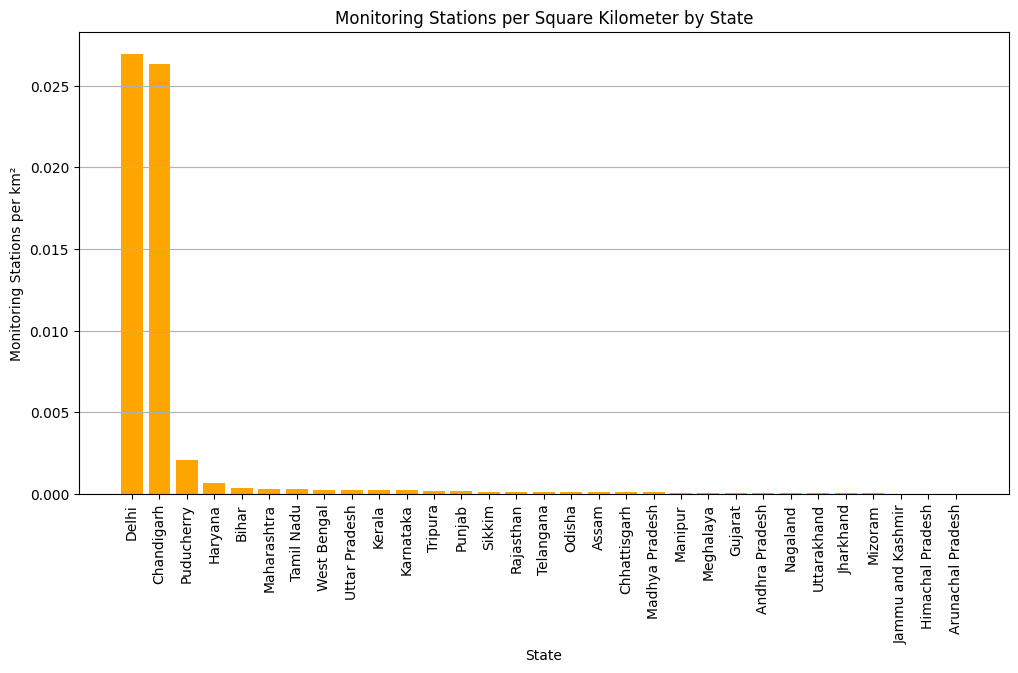

In [4]:
station_counts = data.groupby("state")["station"].nunique().reset_index()
station_counts.columns = ["State", "Monitoring_Stations"]

state_density = pd.merge(station_counts, state_data, on="State", how="inner")
state_density["Stations_per_km2"] = state_density["Monitoring_Stations"] / state_density["Area (km2)"]

state_density = state_density.sort_values("Stations_per_km2", ascending=False)

highest_density = state_density.iloc[0]
print("State with highest monitoring stations per km²:")
print(highest_density)

plt.figure(figsize=(12, 6))
plt.bar(state_density["State"], state_density["Stations_per_km2"], color='orange')
plt.xlabel("State")
plt.ylabel("Monitoring Stations per km²")
plt.title("Monitoring Stations per Square Kilometer by State")
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

**Q3.** Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [4]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2021 = data[data["Timestamp"].dt.year == 2021]

states_interested = ["Maharashtra", "Madhya Pradesh"]
filtered_data = data_2021[data_2021["state"].isin(states_interested)]
average_pm25 = filtered_data.groupby("state")["PM2.5"].mean().reset_index()

state_population_density = state_data[state_data["State"].isin(states_interested)].copy()
state_population_density["Population_Density"] = state_population_density["Population"] / state_population_density["Area (km2)"]

state_comparison = pd.merge(average_pm25, state_population_density, left_on="state", right_on="State", how="inner")
state_comparison = state_comparison[["State", "PM2.5", "Population_Density"]]

print(state_comparison)

            State      PM2.5  Population_Density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


## 6. Funding Based [3 Marks]

**Q1.** Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [11]:
pm25_avg_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()
NCAP_states = NCAP_Funding["State"].dropna().unique().copy()

pm25_avg_state["NCAP_Funded"] = pm25_avg_state['state'].apply(lambda x: "Yes" if x in NCAP_states else "No")
pm25_comparison = pm25_avg_state.groupby("NCAP_Funded")["PM2.5"].mean()

print("Average PM2.5 levels between states that recieved NCAP funding in 2021:", pm25_comparison["Yes"], "µg/m³")
print("Average PM2.5 levels between states that did not recieved NCAP funding in 2021:", pm25_comparison["No"], "µg/m³")

Average PM2.5 levels between states that recieved NCAP funding in 2021: 48.93856076908351 µg/m³
Average PM2.5 levels between states that did not recieved NCAP funding in 2021: 32.95171347756723 µg/m³


**Q2.** Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


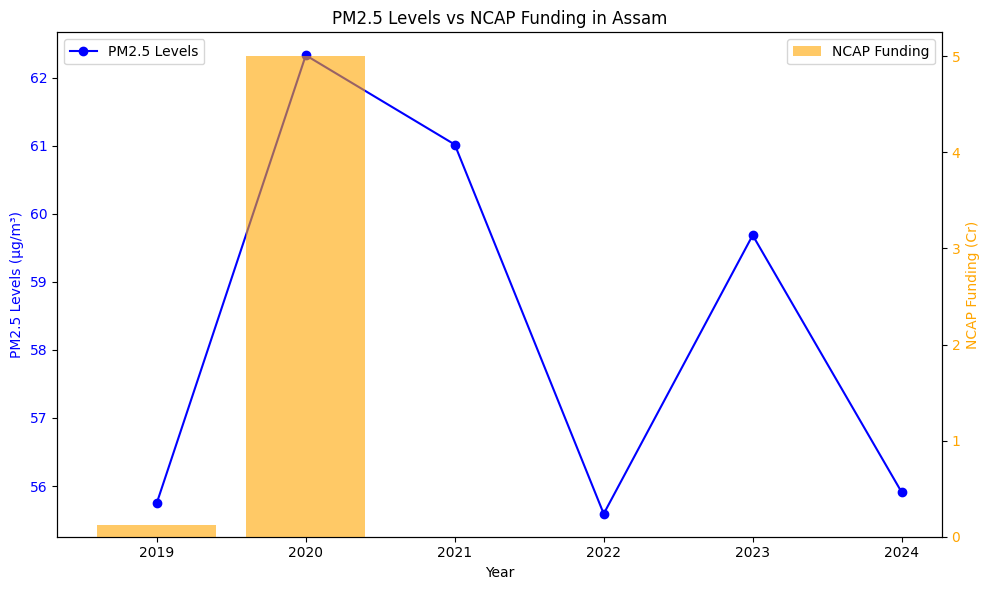

In [18]:
assam_pm25_df = data[(data["state"] == "Assam")]
assam_pm25_df["Timestamp"] = pd.to_datetime(assam_pm25_df["Timestamp"])

assam_pm25_df["Year"] = assam_pm25_df["Timestamp"].dt.year
annual_pm25 = assam_pm25_df.groupby("Year")["PM2.5"].mean().reset_index()

funding_years = ["Amount released during FY 2019-20",
                 "Amount released during FY 2020-21",
                 "Amount released during FY 2021-22"]
assam_funding = NCAP_Funding[NCAP_Funding["State"] == "Assam"]
assam_funding_cleaned = assam_funding[funding_years].replace('-', 0).astype(float)

funding_values_cleaned = [assam_funding_cleaned[year].iloc[0] for year in funding_years]
funding_years_numeric = [2019, 2020, 2021]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(annual_pm25["Year"], annual_pm25["PM2.5"], color='blue', marker='o', label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Levels (µg/m³)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("PM2.5 Levels vs NCAP Funding in Assam")
ax2 = ax1.twinx()
ax2.bar(funding_years_numeric, funding_values_cleaned, color='orange', alpha=0.6, label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (Cr)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Q3.** Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

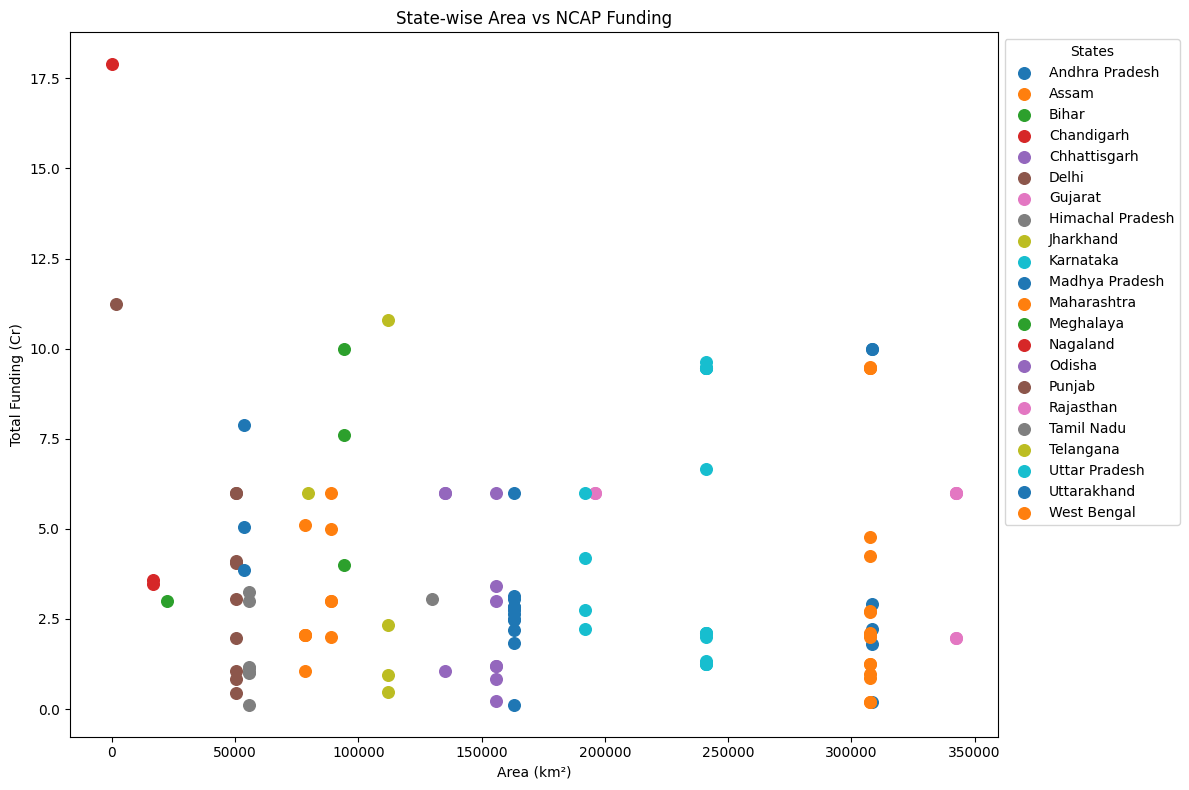

In [3]:
state_funding_data = pd.merge(NCAP_Funding, state_data, on="State")
state_funding_data["Total Funding (Cr)"] = state_funding_data["Total fund released"].replace("-", 0).astype(float)

states = state_funding_data["State"].unique()

fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(states):
    state_data = state_funding_data[state_funding_data["State"] == state]
    ax.scatter(
        state_data["Area (km2)"],
        state_data["Total Funding (Cr)"],
        label=state,
        s=70
    )

ax.set_xlabel("Area (km²)")
ax.set_ylabel("Total Funding (Cr)")
ax.set_title("State-wise Area vs NCAP Funding")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="States")

plt.tight_layout()
plt.show()

## 7. Miscellaneous Questions [4 Marks]

**Q1.** For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³). 

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2023 = data[data['Timestamp'].dt.year == 2023]

city_avg_pm25 = data_2023.groupby('city')['PM2.5'].mean().sort_values(ascending=False)
most_polluted_city = city_avg_pm25.idxmax()

city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = city_data[city_data['PM2.5'] > 300].shape[0]
total_days = city_data['Timestamp'].dt.date.nunique()
percentage_hazardous = (hazardous_days / total_days) * 100 if total_days > 0 else 0

print(f"The most polluted city in 2023 was {most_polluted_city}, with {percentage_hazardous:.2f}% of days recording PM2.5 levels above the hazardous threshold of 300 µg/m³")

The most polluted city in 2023 was Darbhanga, with 0.82% of days recording PM2.5 levels above the hazardous threshold of 300 µg/m³


**Q2.** Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

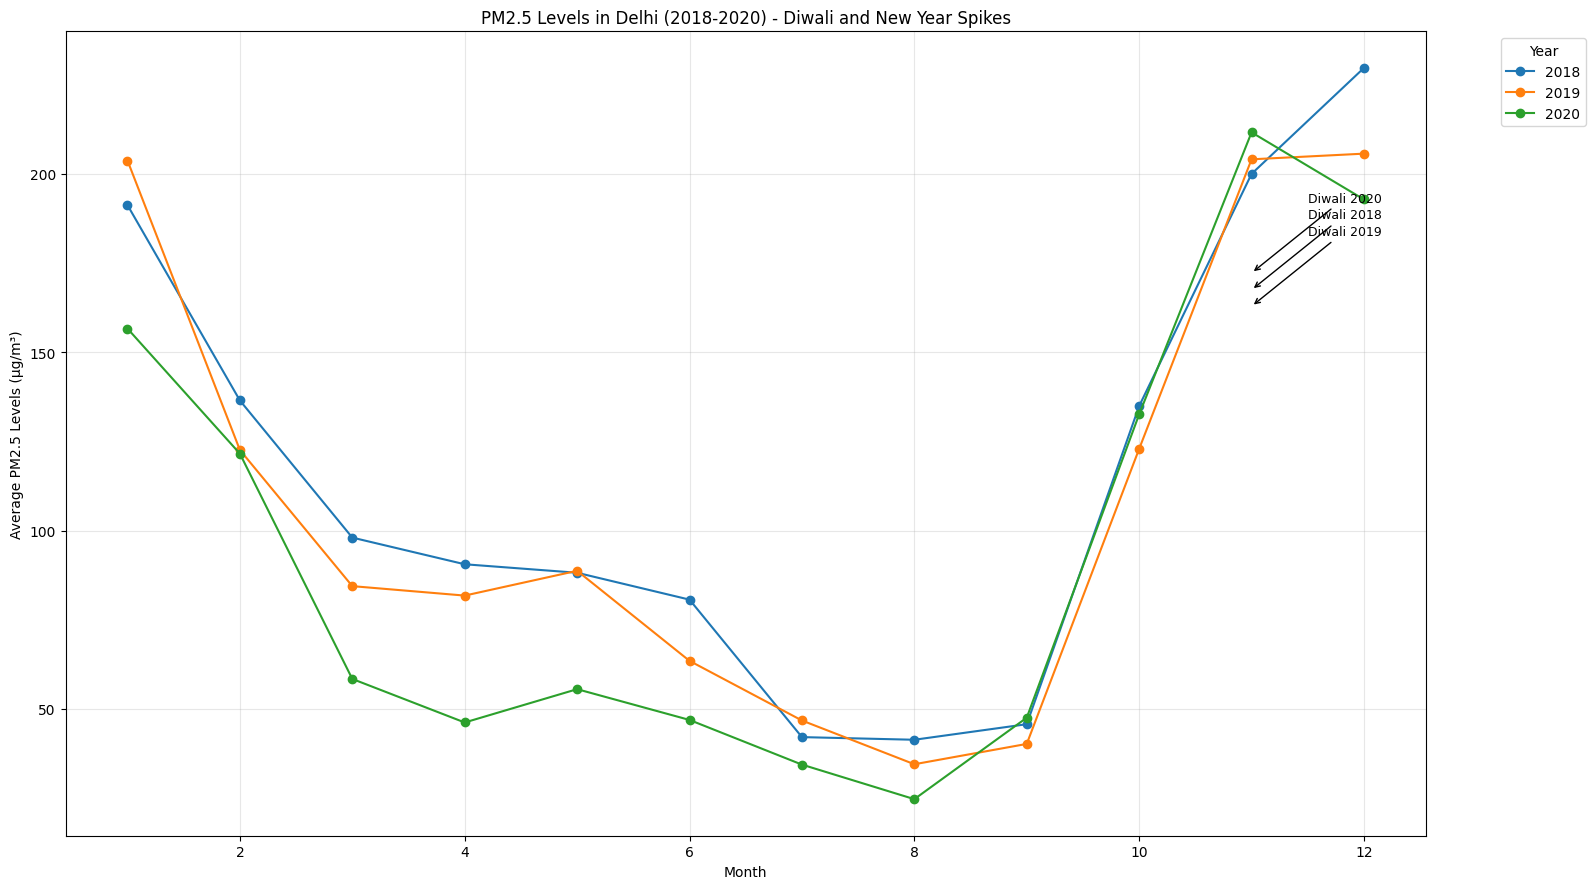

In [7]:
delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))]
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Day'] = delhi_data['Timestamp'].dt.day

diwali_months = [10, 11]
new_year_day = (1, 1)

diwali_data = delhi_data[delhi_data['Month'].isin(diwali_months)]
new_year_data = delhi_data[(delhi_data['Month'] == 1) & (delhi_data['Day'] == 1)]
monthly_avg_pm25 = delhi_data.groupby(['Year', 'Month'])['PM2.5'].mean()

plt.figure(figsize=(16, 9))
monthly_avg_pm25.unstack(level=0).plot(ax=plt.gca(), marker='o', linestyle='-')
for year in [2018, 2019, 2020]:
    diwali_avg = diwali_data[diwali_data['Year'] == year]['PM2.5'].mean()
    new_year_avg = new_year_data[new_year_data['Year'] == year]['PM2.5'].mean()
    
    if not pd.isna(diwali_avg):
        plt.annotate(
            f'Diwali {year}', 
            xy=(11, diwali_avg), 
            xytext=(11.5, diwali_avg + 20), 
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9
        )
    if not pd.isna(new_year_avg):
        plt.annotate(
            f'New Year {year}', 
            xy=(1, new_year_avg), 
            xytext=(1.5, new_year_avg + 20), 
            arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=9
        )
plt.title('PM2.5 Levels in Delhi (2018-2020) - Diwali and New Year Spikes')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

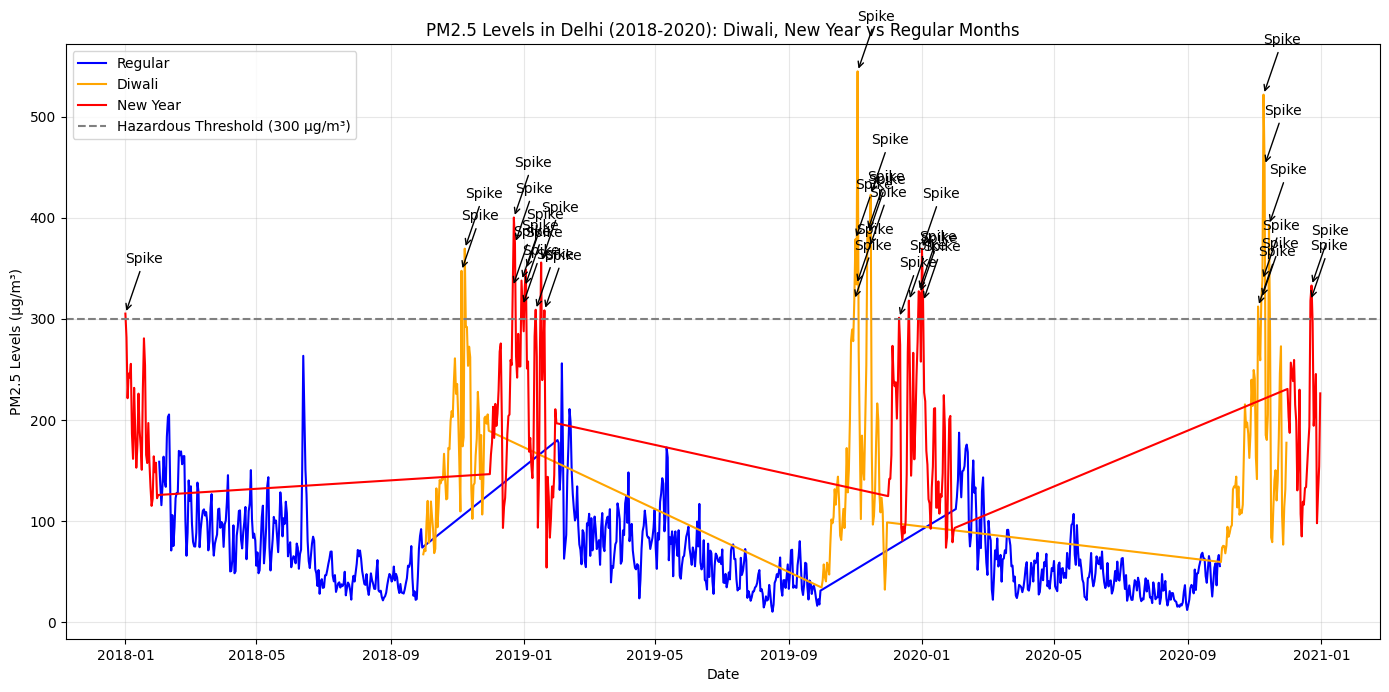

In [22]:
data['Timestamp'] = pd.to_datetime(data2['Timestamp'])
delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month

diwali_months = [10, 11]
new_year_months = [12, 1]

delhi_data['Period'] = delhi_data['Month'].apply(
    lambda x: 'Diwali' if x in diwali_months else ('New Year' if x in new_year_months else 'Regular')
)

daily_avg_pm25 = delhi_data.groupby(['Timestamp', 'Period'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(14, 7))

for period, color in zip(['Regular', 'Diwali', 'New Year'], ['blue', 'orange', 'red']):
    period_data = daily_avg_pm25[daily_avg_pm25['Period'] == period]
    plt.plot(period_data['Timestamp'], period_data['PM2.5'], label=period, color=color)

spike_dates = daily_avg_pm25[
    ((daily_avg_pm25['Period'] == 'Diwali') | (daily_avg_pm25['Period'] == 'New Year'))
    & (daily_avg_pm25['PM2.5'] > 300)
]

for _, row in spike_dates.iterrows():
    plt.annotate(
        'Spike',
        xy=(row['Timestamp'], row['PM2.5']),
        xytext=(row['Timestamp'], row['PM2.5'] + 50),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=10,
        color='black',
    )

plt.title('PM2.5 Levels in Delhi (2018-2020): Diwali, New Year vs Regular Months')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.axhline(y=300, color='gray', linestyle='--', label='Hazardous Threshold (300 µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Q3.** Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

Assam received the highest funding amount during the year 2020.


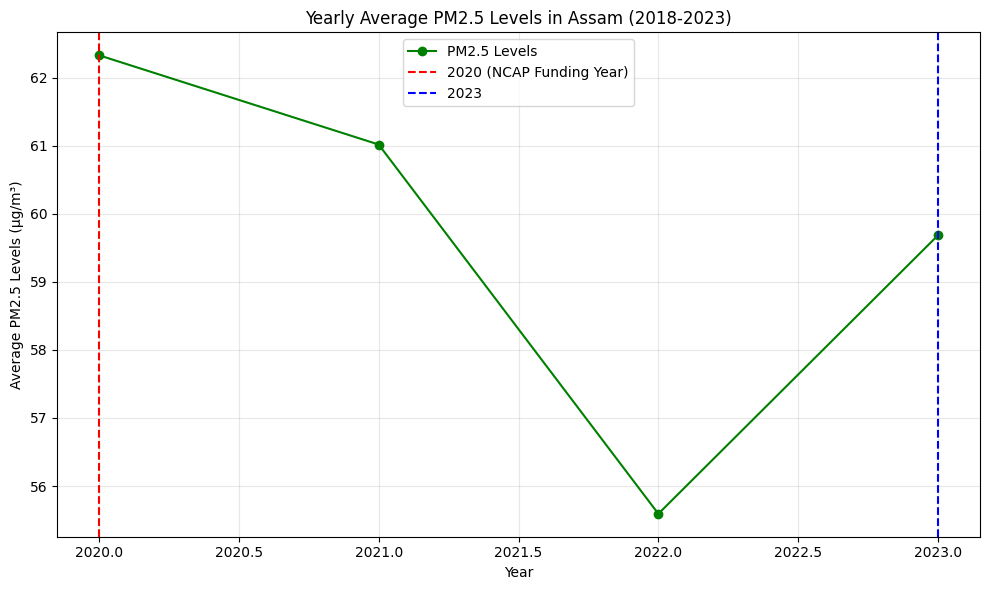

Timestamp
2020    62.329410
2021    61.017780
2022    55.592354
2023    59.685088
Name: PM2.5, dtype: float64

Clearly, the PM2.5 levels in Assam have been declining since 2020, the year with the highest funding amount.


In [17]:
NCAP_Funding['Amount released during FY 2020-21'] = pd.to_numeric(NCAP_Funding['Amount released during FY 2020-21'], errors='coerce')

highest_funding_state = NCAP_Funding.loc[NCAP_Funding['Amount released during FY 2020-21'].idxmax(), 'State']
assam_data = data[(data['state'] == 'Assam') & (data['Timestamp'].dt.year.between(2020, 2023))]
yearly_avg_pm25 = assam_data.groupby(assam_data['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(10, 6))
yearly_avg_pm25.plot(kind='line', marker='o', color='green', linestyle='-', label='PM2.5 Levels')
plt.axvline(x=2020, color='red', linestyle='--', label='2020 (NCAP Funding Year)')
plt.axvline(x=2023, color='blue', linestyle='--', label='2023')
plt.title('Yearly Average PM2.5 Levels in Assam (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
print(f"{highest_funding_state} received the highest funding amount during the year 2020.")
plt.show()
display(yearly_avg_pm25)
print("Clearly, the PM2.5 levels in Assam have been declining since 2020, the year with the highest funding amount.")

**Q4.** Draw the map of India and plot the sensor locations on the map.

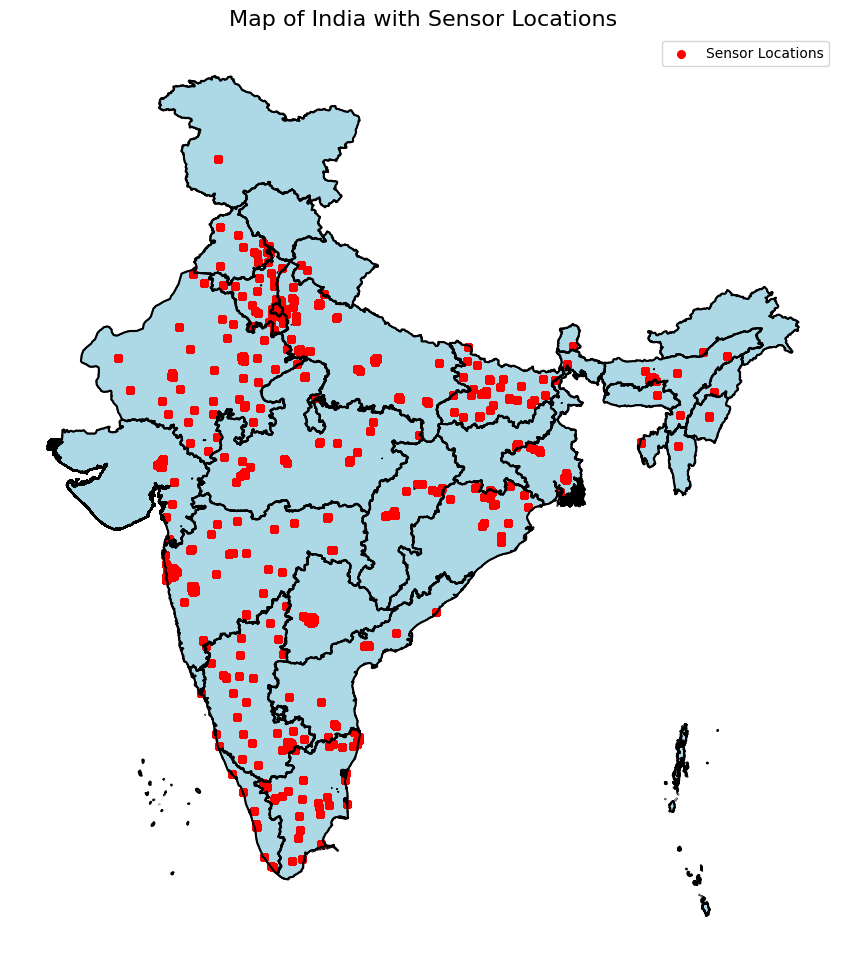

In [9]:
import geopandas as gpd

india_states = gpd.read_file("states_india.geojson")

latitude_column = "latitude"
longitude_column = "longitude"
latitudes = data[latitude_column]
longitudes = data[longitude_column]

fig, ax = plt.subplots(figsize=(12, 12))
india_states.boundary.plot(ax=ax, color="black")
india_states.plot(ax=ax, color="lightblue", edgecolor="black")

ax.scatter(longitudes, latitudes, color="red", s=30, label="Sensor Locations")
ax.set_title("Map of India with Sensor Locations", fontsize=16)
ax.legend()
ax.axis("off")

plt.show()


## 8. Tell us something new [1 Mark]

**Q.** Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.